In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

In [2]:
adv = pd.read_csv('advertising.csv')
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
adv.shape

(1000, 10)

In [4]:
adv.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
# Here Timestamp is in the object dtype 

In [7]:
adv['Timestamp'] = pd.to_datetime(adv.Timestamp)
adv['Year']  = pd.DatetimeIndex(adv['Timestamp']).year
adv['Month'] = pd.DatetimeIndex(adv['Timestamp']).month

In [9]:
adv.drop(['Timestamp'], axis = 1)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Clicked on Ad,Year,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,0,2016,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,0,2016,4
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,0,2016,3
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,0,2016,1
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,0,2016,6
...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,1,2016,2
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,1,2016,4
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,1,2016,2
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,0,2016,3


In [10]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  1000 non-null   float64       
 1   Age                       1000 non-null   int64         
 2   Area Income               1000 non-null   float64       
 3   Daily Internet Usage      1000 non-null   float64       
 4   Ad Topic Line             1000 non-null   object        
 5   City                      1000 non-null   object        
 6   Male                      1000 non-null   int64         
 7   Country                   1000 non-null   object        
 8   Timestamp                 1000 non-null   datetime64[ns]
 9   Clicked on Ad             1000 non-null   int64         
 10  Year                      1000 non-null   int64         
 11  Month                     1000 non-null   int64         
dtypes: datetime64[ns](1),

In [11]:
adv.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad', 'Year', 'Month'],
      dtype='object')

In [12]:
adv.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Year,Month
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.0,1000.000000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000,2016.0,3.817000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025,0.0,1.926973
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000,2016.0,1.000000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000,2016.0,2.000000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000,2016.0,4.000000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000,2016.0,5.000000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000,2016.0,7.000000


/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/a/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


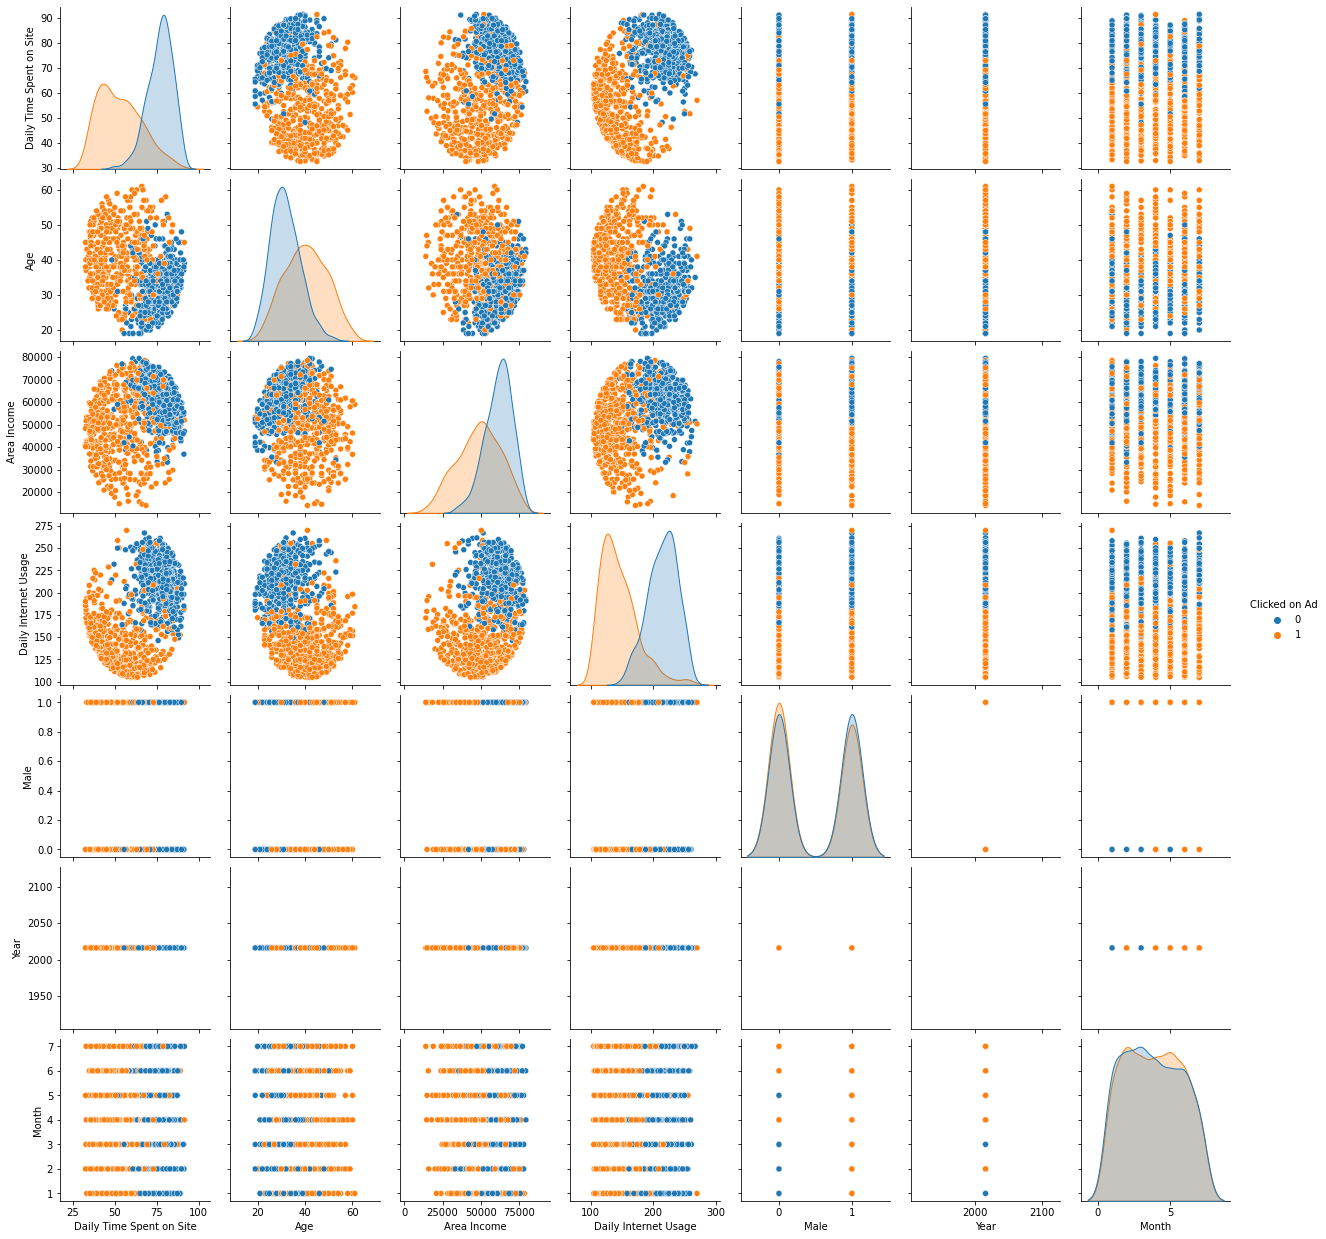

In [13]:
sns.pairplot(adv , hue = 'Clicked on Ad')

<AxesSubplot:>

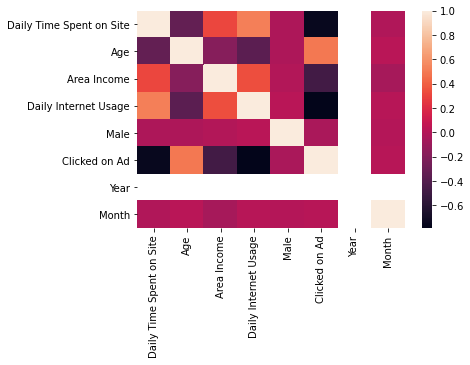

In [14]:
sns.heatmap(adv.corr())

<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

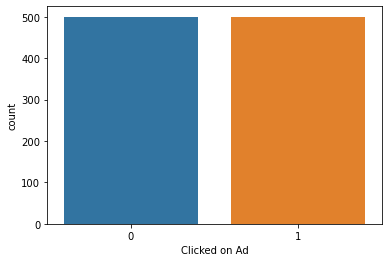

In [15]:
sns.countplot(x = 'Clicked on Ad' , data = adv )

In [16]:
X = adv[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male','Year', 'Month']]
y = adv['Clicked on Ad']

In [17]:
X_train , X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30 , random_state = 101)

In [18]:
X_train

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Year,Month
290,50.52,31,72270.88,171.62,0,2016,1
167,86.06,31,53767.12,219.72,1,2016,4
486,83.97,40,66291.67,158.42,1,2016,2
683,76.83,28,67990.84,192.81,0,2016,3
876,67.39,44,51257.26,107.19,0,2016,1
...,...,...,...,...,...,...,...
575,48.86,54,53188.69,134.46,0,2016,1
838,44.13,40,33601.84,128.48,1,2016,3
337,75.32,28,59998.50,233.60,1,2016,1
523,67.94,43,68447.17,128.16,0,2016,5


In [20]:
y_test

545    1
298    0
109    0
837    1
194    0
      ..
847    0
682    1
884    0
325    1
482    0
Name: Clicked on Ad, Length: 300, dtype: int64

In [21]:
model = LogisticRegression()

In [22]:
model.fit(X_train,y_train)

LogisticRegression()

In [23]:
pred = model.predict(X_test)

In [24]:
pred

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0])

In [25]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       157
           1       0.99      0.97      0.98       143

    accuracy                           0.98       300
   macro avg       0.98      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [26]:
print(confusion_matrix(y_test,pred))

[[155   2]
 [  5 138]]


<AxesSubplot:>

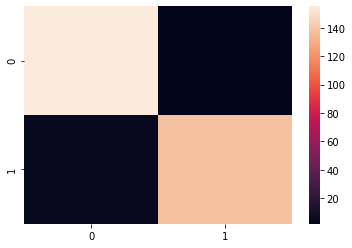

In [27]:
sns.heatmap(confusion_matrix(y_test,pred))